# Variações de duas Séries no mesmo Gráfico - Estudos Part14 Séries Temporais

In [1]:
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
df = pd.read_csv('italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [3]:
df.index = pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [7]:
# Filtrando os dados e agrupando
depth_magn = df.where((df['Magnitude'] >= 3.0)).dropna()[['Magnitude', 'Depth/Km']]
dm = depth_magn.groupby(depth_magn.index.hour).mean()
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


Text(0.5, 1.0, 'Magnitude VS Produndidade Durante o Dia')

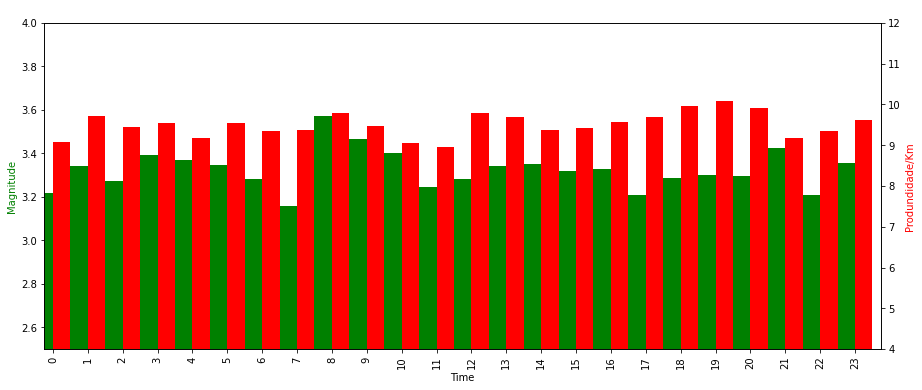

In [12]:
# Criando o elemento grafico
fig = plt.figure()
# 2 eixos -  magnitude e profundidade
ax = fig.add_subplot(111)
ax.set_ylim([2.5,4.0])
ax.set_ylabel('Magnitude')
ax.set_xlabel('Hora do Dia')
ax.yaxis.label.set_color('green')

# o twinx cria outro conjunto de barras com o mesmo eixo e com as mesmas caracteristicas do primeiro
ax2 = ax.twinx()
ax2.set_ylim([4.0,12])
ax2.set_ylabel('Produndidade/Km')
ax2.set_xlabel('Hora do Dia')
ax2.yaxis.label.set_color('red')

# Plotando o grafico com as especificações
width = 0.5
dm['Magnitude'].plot(kind='bar', color='green', ax = ax, width=width, position=1)
dm['Depth/Km'].plot(kind='bar', color='red', ax = ax2, width=width, position=0)
plt.grid(False)
plt.title('Magnitude VS Produndidade Durante o Dia', color='white')